In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'comp4211/'
assert FOLDERNAME is not None, "[1]Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


#Use Pretrained Retinaface Model to do face detection task

In [ ]:
!pip install -U retinaface_pytorch

     |████████████████████████████████| 8.2MB 11.9MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 634kB 55.7MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 112kB 62.1MB/s 
     |████████████████████████████████| 4.2MB 52.7MB/s 
     |████████████████████████████████| 163kB 58.5MB/s 
     |████████████████████████████████| 2.1MB 43.7MB/s 
     |████████████████████████████████| 122kB 57.3MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp37-none-any.whl size=654019 sha256=d994fceec5f923b76943aac2ba58c08763e773060ce544f3195d2d79ac233e8b
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=ee98e27a3dc3e1d00480729b88f66585b3f6e3a686bc6df3dc49f016cbab611e
  Stored in directory: /root/.cac

In [ ]:
import cv2
from retinaface.pre_trained_models import get_model
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from bs4 import BeautifulSoup
import torchvision
from torchvision import transforms, datasets, models
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from retinaface.pre_trained_models import get_model
from retinaface.utils import vis_annotations
from pandas.core.frame import DataFrame
from tqdm.notebook import tqdm
from torch import optim 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder

In [ ]:
plt.rcParams["figure.figsize"] = (32, 32)

In [ ]:
image = cv2.imread("/content/drive/My Drive/comp4211/proj1/images/maksssksksss1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

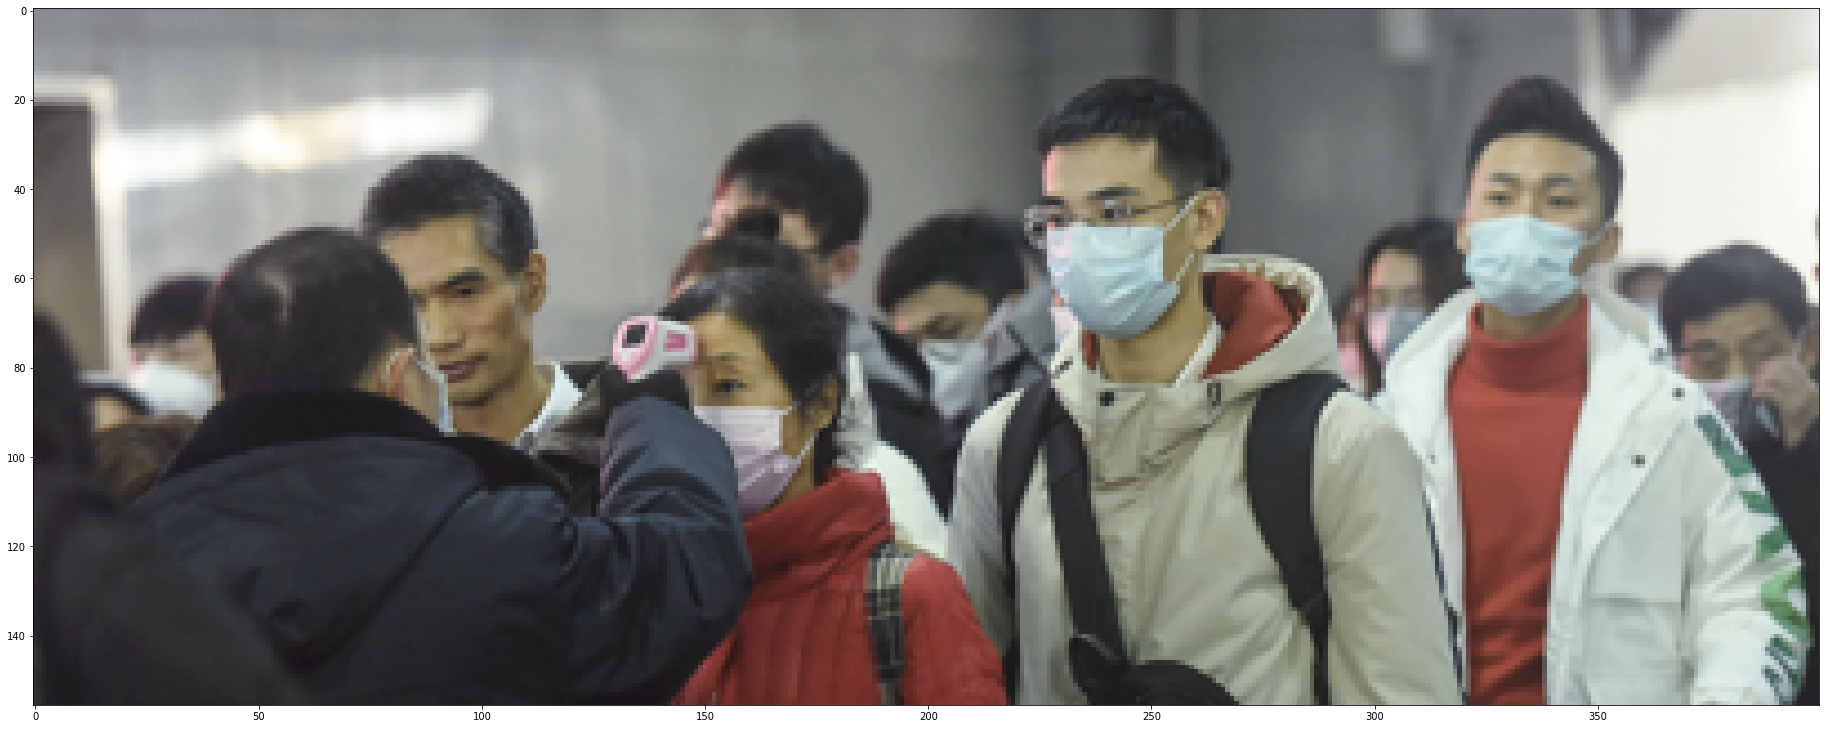

In [ ]:
plt.imshow(image)

In [ ]:
model = get_model("resnet50_2020-07-20", max_size=2048)
model.eval()

annotation = model.predict_jsons(image)
annotation

Downloading: "https://github.com/ternaus/retinaface/releases/download/0.01/retinaface_resnet50_2020-07-20-f168fae3c.zip" to /root/.cache/torch/hub/checkpoints/retinaface_resnet50_2020-07-20-f168fae3c.zip


/usr/local/lib/python3.7/dist-packages/torch/hub.py:452: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


[{'bbox': [225, 29, 258, 72],
  'landmarks': [[229, 46], [242, 46], [232, 55], [233, 62], [242, 61]],
  'score': 0.9983755350112915},
 {'bbox': [321, 27, 351, 67],
  'landmarks': [[328, 42], [341, 43], [333, 50], [328, 56], [337, 58]],
  'score': 0.9965483546257019},
 {'bbox': [368, 65, 395, 97],
  'landmarks': [[374, 78], [387, 76], [381, 84], [378, 90], [387, 88]],
  'score': 0.9965152740478516},
 {'bbox': [78, 48, 109, 88],
  'landmarks': [[84, 66], [97, 63], [90, 74], [89, 80], [99, 77]],
  'score': 0.9949305653572083},
 {'bbox': [298, 54, 315, 80],
  'landmarks': [[301, 64], [309, 64], [304, 69], [302, 74], [308, 73]],
  'score': 0.9947580695152283},
 {'bbox': [138, 70, 170, 112],
  'landmarks': [[142, 83], [155, 85], [144, 91], [142, 99], [152, 100]],
  'score': 0.9933522939682007},
 {'bbox': [192, 61, 218, 93],
  'landmarks': [[196, 74], [205, 72], [199, 79], [199, 85], [205, 83]],
  'score': 0.9701361060142517},
 {'bbox': [150, 38, 178, 71],
  'landmarks': [[156, 50], [167, 52]

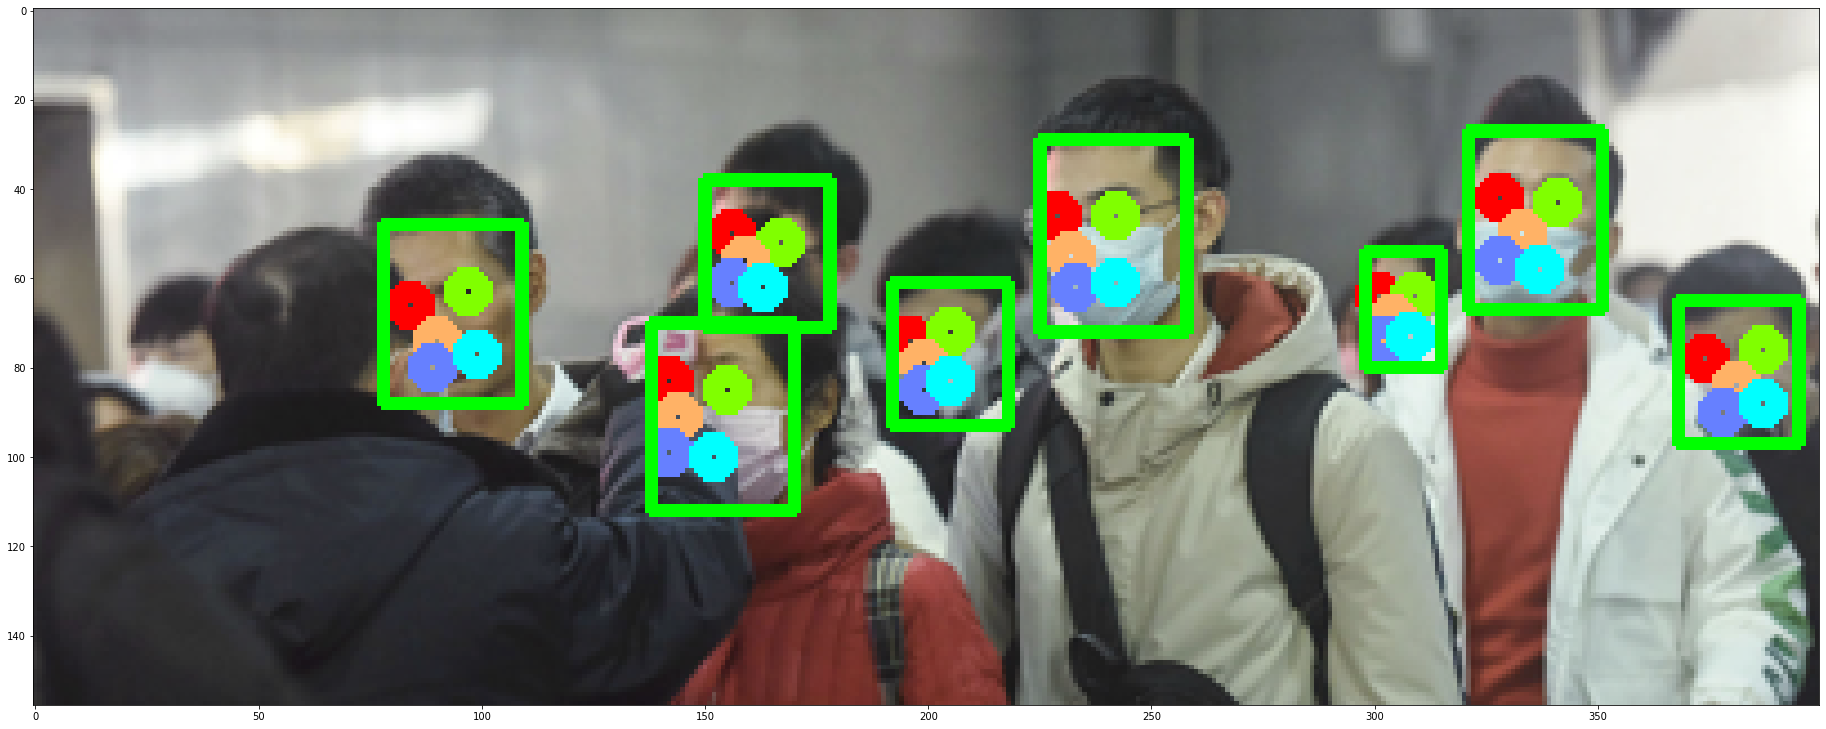

In [ ]:
plt.imshow(vis_annotations(image, annotation))

# Detection

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
'''
model = get_model("resnet50_2020-07-20", max_size=2048)
model.eval()
annotation_set = []

imgs_filename = list(sorted(os.listdir("/content/drive/My Drive/comp4211/proj1/images/")))
labels_filename = list(sorted(os.listdir("/content/drive/My Drive/comp4211/proj1/annotations/")))
annot_dic = []
for i in tqdm(range(len(imgs_filename))):
  file_image = 'maksssksksss'+ str(i) + '.png'
  img_path = os.path.join("/content//drive/My Drive/comp4211/proj1/images/", file_image)

  image = cv2.imread(img_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = image.to(device)
  annotation = model.predict_jsons(image)
  annotation_set.append(annotation)
'''

In [ ]:
#annotation_set

In [ ]:
#test
'''
image = cv2.imread("/content/drive/My Drive/comp4211/proj1/images/maksssksksss24.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(vis_annotations(image, annotation_set[24]))
'''

In [ ]:
#len(annotation_set)

In [ ]:
#DataFrame(annotation_set).to_csv("/content/drive/My Drive/comp4211/proj1/Retinaface_annot.csv")

In [ ]:
#DataFrame(annotation_set)

#clip the image

In [ ]:
#basic function for generating data

def generate_box(obj):
    
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0

def generate_target(image_id, file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, 'xml')
        objects = soup.find_all('object')

        num_objs = len(objects)

        # Bounding boxes for objects
        # In coco format, bbox = [xmin, ymin, width, height]
        # In pytorch, the input should be [xmin, ymin, xmax, ymax]
        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # Labels (In my case, I only one class: target class or background)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        # Tensorise img_id
        img_id = torch.tensor([image_id])
        # Annotation is in dictionary format
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = img_id
        
        return target

In [ ]:
#clip the image
import PIL.Image as img
import os
'''
labels = []
for i in tqdm(range(len(imgs_filename))):
  count = 0
  file_image = 'maksssksksss'+ str(i) + '.png'
  img_path = os.path.join("/content//drive/My Drive/comp4211/proj1/images/", file_image)
  img = Image.open(img_path).convert("RGB")

  #clip the image
  box = annotation_set[i]
  for box_range in box:
    #box_range = torch.tensor(box_range,dtype=torch.int32)
    if box_range['bbox'] != []:
      clip_img = img.crop(box_range['bbox'])
      clip_img.save('/content/drive/My Drive/comp4211/proj1/img_Retinaface/mask_retina{}_{}.png'.format(i,count))
    count+=1
'''

'\nlabels = []\nfor i in tqdm(range(len(imgs_filename))):\n  count = 0\n  file_image = \'maksssksksss\'+ str(i) + \'.png\'\n  img_path = os.path.join("/content//drive/My Drive/comp4211/proj1/images/", file_image)\n  img = Image.open(img_path).convert("RGB")\n\n  #clip the image\n  box = annotation_set[i]\n  for box_range in box:\n    #box_range = torch.tensor(box_range,dtype=torch.int32)\n    if box_range[\'bbox\'] != []:\n      clip_img = img.crop(box_range[\'bbox\'])\n      clip_img.save(\'/content/drive/My Drive/comp4211/proj1/img_Retinaface/mask_retina{}_{}.png\'.format(i,count))\n    count+=1\n'

#Dataset and dataloader

In [ ]:
img_Retina = list(sorted(os.listdir("/content/drive/My Drive/comp4211/proj1/img_Retinaface/")))
len(img_Retina)

4286

In [ ]:
#generating dataframe dataset
img_clip_path = []
for name in tqdm(img_Retina):
  file_image = name
  img_clip_path.append(file_image)

df_img_path = DataFrame(img_clip_path)

In [ ]:
df_img_path.columns = ['img_name']
df_img_path.to_csv('/content/drive/My Drive/comp4211/proj1/Retina_path.csv', header=True, index=False)
df_img_path

,img_name
0,mask_retina0_0.png
1,mask_retina0_1.png
2,mask_retina0_2.png
3,mask_retina100_0.png
4,mask_retina100_1.png
...,...
4281,mask_retina99_1.png
4282,mask_retina99_2.png
4283,mask_retina99_3.png
4284,mask_retina9_0.png


In [ ]:
class MaskDataset_Retina(object):
    def __init__(self, csv_file,transforms = None):
        self.transforms = transforms
        self.labels_data = pd.read_csv(csv_file)
        self.imgs_clip = list(sorted(os.listdir("/content/drive/My Drive/comp4211/proj1/img_Retinaface/")))
        

    def __getitem__(self, idx):
        # load images ad mask
        file_image = self.labels_data.iloc[idx, 0]
        img_clip_path = os.path.join("/content/drive/My Drive/comp4211/proj1/img_Retinaface/", file_image)
        img = Image.open(img_clip_path).convert("RGB")
       
        
        if self.transforms is not None:
            img = self.transforms(img)

        return img

    def __len__(self):
        return len(self.labels_data)

In [ ]:
data_valid_path ='/content/drive/My Drive/comp4211/proj1/Retina_path.csv'

In [ ]:
transf = transforms.Compose(
    [transforms.Resize((32,32)), transforms.ToTensor()])

valid_dataest = MaskDataset_Retina(data_valid_path, transforms=transf)
valid_loader = DataLoader(valid_dataest, batch_size=1, shuffle=False, num_workers=4, pin_memory=True)

#dataiter = iter(valid_loader)
#input = next(dataiter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# replace the entire classifier block by encapsulating VGG in a new model
import torch.nn as nn
import torch.nn.functional as F

class Modified_VGG_FT(nn.Module):

    def __init__(self):
        super(Modified_VGG_FT, self).__init__()
        self.vgg = torchvision.models.vgg16(pretrained=True)

        for param in self.vgg.parameters():
            param.requires_grad = True

        self.vgg.classifier = nn.Linear(512*7*7, 3)

    def forward(self, images):
        return self.vgg(images)

modified_vgg_ft = Modified_VGG_FT().cuda()
#summary(modified_vgg, torch.zeros((64, 3, 32, 32)).cuda())

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [ ]:
def load_checkpoint(save_path, model, optimizer):
    save_path = save_path 
    state_dict = torch.load(save_path)
    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])
    val_accu = state_dict['val_accu']
    print(f'Model loaded from {save_path}, with val accu: {val_accu}')
    return val_accu

#Classification use pretrained model

##Prediciton use vgg

In [ ]:
#prediction
load_model = modified_vgg_ft
load_optimizer = optim.Adam(load_model.parameters(), lr=0.001)
save_path = f'/content/drive/My Drive/comp4211/proj1/modified_vgg_ft.pt'

best_val_accu = load_checkpoint(save_path, load_model, load_optimizer)

load_model.eval()
y_pred = []

with torch.no_grad():
    for input in tqdm(valid_loader):
        input = input.to(device)
        outputs = load_model(input)
        y_pred.extend(outputs.cpu().detach().numpy())

y = np.array(y_pred)
print(y)


#df.to_csv('/content/drive/My Drive/comp4211/file.csv', header=True, index=False)

Model loaded from /content/drive/My Drive/comp4211/proj1/modified_vgg_ft.pt, with val accu: 0.9693251252174377


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



[[  4.3695965   -2.9219341   -4.5775685 ]
 [  4.332621    -2.8985496   -4.629069  ]
 [-14.300614     6.0033064   -5.9472723 ]
 ...
 [ -2.175883     0.96298933  -1.4340206 ]
 [  5.1576104   -3.8119104   -5.6497307 ]
 [ -1.6422619    0.68407357  -1.2199576 ]]


In [ ]:
label_pred = np.argmax(y, axis=1)
len(label_pred)
df_label = DataFrame(label_pred)

In [ ]:
df_data = pd.concat([df_img_path, df_label], axis=1)
df_data.columns = ['img_name','label']
df_data.to_csv('/content/drive/My Drive/comp4211/proj1/proj1_retina_label.csv', header=True, index=False)
df_data

##Evaluation F1 score

In [ ]:
def compute_iou(rec1, rec2):
    """
    computing IoU
    :param rec1: (y0, x0, y1, x1), which reflects
            (top, left, bottom, right)
    :param rec2: (y0, x0, y1, x1)
    :return: scala value of IoU
    """
    # computing area of each rectangles
    S_rec1 = (rec1[2] - rec1[0]) * (rec1[3] - rec1[1])
    S_rec2 = (rec2[2] - rec2[0]) * (rec2[3] - rec2[1])
 
    # computing the sum_area
    sum_area = S_rec1 + S_rec2
 
    # find the each edge of intersect rectangle
    left_line = max(rec1[1], rec2[1])
    right_line = min(rec1[3], rec2[3])
    top_line = max(rec1[0], rec2[0])
    bottom_line = min(rec1[2], rec2[2])
 
    # judge if there is an intersect
    if left_line >= right_line or top_line >= bottom_line:
        return 0
    else:
        intersect = (right_line - left_line) * (bottom_line - top_line)
        return (intersect / (sum_area - intersect))*1.0


In [ ]:
labels_truth = []
imgs_filename = list(sorted(os.listdir("/content/drive/My Drive/comp4211/proj1/images/")))

for i in tqdm(range(len(imgs_filename))):
  file_label = 'maksssksksss'+ str(i) + '.xml'
  label_path = os.path.join("/content/drive/My Drive/comp4211/proj1/annotations/", file_label)

  annot = generate_target(i, label_path)
  label = annot["labels"]
  labels_truth.append(label.tolist())
labels_truth

[[0, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 2],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1],
 [1, 0, 0, 1],
 [1],
 [1, 1, 1, 0],
 [1],
 [2, 0],
 [1],
 [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 [1, 1, 2, 1, 1, 1],
 [0],
 [1, 1],
 [1],
 [1],
 [1, 1],
 [0, 1, 0, 1, 1, 0],
 [1],
 [1, 1, 1, 1, 0],
 [1],
 [1],
 [2],
 [1],
 [1, 1],
 [1],
 [1],
 [1, 2, 2],
 [1, 0, 1, 1, 1, 0, 1],
 [1, 1],
 [1, 1],
 [1],
 [1, 1, 1, 0, 1, 1, 1, 0],
 [1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1],
 [1, 0],
 [1, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1],
 [1, 1, 1, 0],
 [0, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1],
 [0],
 [1, 1, 1, 1, 1, 1, 0, 0],
 [1, 1],
 [0],
 [0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  2,
  0,
  0,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  2,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  2,
  1],
 [1, 1, 1],
 [1

In [ ]:
DataFrame(labels_truth).to_csv('/content/drive/My Drive/comp4211/proj1/proj1_truth_label.csv', header=True, index=False)

In [ ]:
annot_pred = pd.read_csv("/content/drive/My Drive/comp4211/proj1/Retinaface_annot.csv",index_col=0)
#annot_pred.drop(0, axis=1)
annot_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,"{'bbox': [78, 100, 108, 139], 'score': 0.99932...","{'bbox': [319, 81, 360, 139], 'score': 0.99805...","{'bbox': [182, 89, 225, 144], 'score': 0.96588...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'bbox': [225, 29, 258, 72], 'score': 0.998375...","{'bbox': [321, 27, 351, 67], 'score': 0.996548...","{'bbox': [368, 65, 395, 97], 'score': 0.996515...","{'bbox': [78, 48, 109, 88], 'score': 0.9949305...","{'bbox': [298, 54, 315, 80], 'score': 0.994758...","{'bbox': [138, 70, 170, 112], 'score': 0.99335...","{'bbox': [192, 61, 218, 93], 'score': 0.970136...","{'bbox': [150, 38, 178, 71], 'score': 0.959778...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'bbox': [70, 33, 99, 68], 'score': 0.99414825...","{'bbox': [239, 26, 266, 66], 'score': 0.992725...","{'bbox': [333, 23, 364, 61], 'score': 0.989315...","{'bbox': [154, 43, 175, 71], 'score': 0.974500...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'bbox': [155, 54, 175, 80], 'score': 0.999328...","{'bbox': [236, 51, 256, 75], 'score': 0.998884...","{'bbox': [51, 50, 71, 74], 'score': 0.99842226...","{'bbox': [314, 63, 332, 88], 'score': 0.998283...","{'bbox': [72, 49, 89, 71], 'score': 0.99775046...","{'bbox': [288, 57, 307, 79], 'score': 0.996053...","{'bbox': [123, 55, 142, 76], 'score': 0.992592...","{'bbox': [188, 56, 207, 78], 'score': 0.991655...","{'bbox': [269, 73, 284, 92], 'score': 0.974861...","{'bbox': [352, 30, 366, 53], 'score': 0.965170...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'bbox': [65, 164, 171, 292], 'score': 0.99993...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,"{'bbox': [353, -5, 380, 47], 'score': 0.938404...","{'bbox': [141, 54, 158, 72], 'score': 0.932585...","{'bbox': [183, 67, 198, 82], 'score': 0.829501...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,"{'bbox': [211, 24, 230, 47], 'score': 0.999222...","{'bbox': [94, 16, 106, 32], 'score': 0.9948028...","{'bbox': [352, 11, 369, 34], 'score': 0.9

In [ ]:
df_data = pd.read_csv('/content/drive/My Drive/comp4211/proj1/proj1_retina_label.csv')
df_data

,img_name,label
0,mask_retina0_0.png,0
1,mask_retina0_1.png,0
2,mask_retina0_2.png,1
3,mask_retina100_0.png,1
4,mask_retina100_1.png,1
...,...,...
4281,mask_retina99_1.png,1
4282,mask_retina99_2.png,1
4283,mask_retina99_3.png,1
4284,mask_retina9_0.png,0


In [ ]:
label_pred =  df_data.loc[df_data['img_name']=='mask_retina{}_{}.png'.format(100,0),"label"]
label_pred = int(label_pred)
label_pred

1

In [ ]:
annot_pred = annot_pred.fillna(0)

In [ ]:
TP,FP,FN = 0,0,0
for i in tqdm(range(len(imgs_filename))):
  file_label = 'maksssksksss'+ str(i) + '.xml'
  label_path = os.path.join("/content/drive/My Drive/comp4211/proj1/annotations/", file_label)
  annot = generate_target(i, label_path)
  box_truth = annot["boxes"]
  count = 0
  for box_range in box_truth:
    box_range = torch.tensor(box_range,dtype=torch.int32)
    count_pred = 0
    find = False
    for j in range(len(annot_pred.iloc[i])):
      #read valid predict boxes
      if annot_pred.iloc[i][j] != 0:
        #print(annot_pred.iloc[i][j])
        box_pred = eval(annot_pred.iloc[i][j])
        score = box_pred['score']
        box_pred = torch.tensor(box_pred['bbox'],dtype=torch.int32)
        #check whether the predict box is empty
        if score!=-1:
          iou = compute_iou(box_pred,box_range)
          if iou>0.5:
            label_pred =  df_data.loc[df_data['img_name']=='mask_retina{}_{}.png'.format(i,count_pred),"label"]
            if labels_truth[i][count] == int(label_pred):
              TP+=1
              find = True
              break
            else:
              FP+=1
              find = True
              break
      count_pred+=1
    if find == False:
      FN+=1
    count+=1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


In [ ]:
TP

2785

In [ ]:
FN = 4072 - TP
FP = 4286 - TP
print("TP = ", TP, "FP = ", FP,"FN = ", FN)

TP =  2785 FP =  1501 FN =  1287


In [ ]:
#precision
P = TP/(TP+FP)

#Recall
R = TP/(TP+FN)

#F1
F1 = (2*P*R)/(P+R)

print("The precision is", P, "The Recall is ", R ,"F1 is ", F1)

The precision is 0.6497900139990668 The Recall is  0.6839390962671905 F1 is  0.6664273749700885


##Prediction use resnet18

In [ ]:
class Modified_resnet18_FT(nn.Module):

    def __init__(self):
        super(Modified_resnet18_FT, self).__init__()
        self.resnet18 = torchvision.models.resnet18(pretrained=True)

        for param in self.resnet18.parameters():
            param.requires_grad = True

        self.resnet18.fc = nn.Linear(512, 3)

    def forward(self, images):
        return self.resnet18(images)

modified_resnet18_ft = Modified_resnet18_FT().cuda()
#summary(modified_resnet18_ft, torch.zeros((64, 3, 32, 32)).cuda())

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
#prediction
load_model = modified_resnet18_ft
load_optimizer = optim.Adam(load_model.parameters(), lr=0.001)
save_path = f'/content/drive/My Drive/comp4211/proj1/modified_res18_ft.pt'

best_val_accu = load_checkpoint(save_path, load_model, load_optimizer)

load_model.eval()
y_pred = []

with torch.no_grad():
    for input in tqdm(valid_loader):
        input = input.to(device)
        outputs = load_model(input)
        y_pred.extend(outputs.cpu().detach().numpy())

y = np.array(y_pred)
print(y)


#df.to_csv('/content/drive/My Drive/comp4211/file.csv', header=True, index=False)

Model loaded from /content/drive/My Drive/comp4211/proj1/modified_res18_ft.pt, with val accu: 0.9693251252174377


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



[[  4.959611   -11.766067   -11.334189  ]
 [  5.863874   -11.668494   -11.371727  ]
 [ -3.7035995    5.454176    -3.1180522 ]
 ...
 [ -2.5672035    2.9271107   -1.1327777 ]
 [  3.2626703   -4.2019567   -2.7884512 ]
 [ -2.957824     0.26127946   1.5433077 ]]


In [ ]:
label_pred = np.argmax(y, axis=1)
len(label_pred)
df_label = DataFrame(label_pred)      
df_data = pd.concat([df_img_path, df_label], axis=1)
df_data.columns = ['img_name','label']
df_data

,img_name,label
0,mask_retina0_0.png,0
1,mask_retina0_1.png,0
2,mask_retina0_2.png,1
3,mask_retina100_0.png,1
4,mask_retina100_1.png,1
...,...,...
4281,mask_retina99_1.png,2
4282,mask_retina99_2.png,1
4283,mask_retina99_3.png,1
4284,mask_retina9_0.png,0


In [ ]:
annot_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,"{'bbox': [78, 100, 108, 139], 'score': 0.99932...","{'bbox': [319, 81, 360, 139], 'score': 0.99805...","{'bbox': [182, 89, 225, 144], 'score': 0.96588...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"{'bbox': [225, 29, 258, 72], 'score': 0.998375...","{'bbox': [321, 27, 351, 67], 'score': 0.996548...","{'bbox': [368, 65, 395, 97], 'score': 0.996515...","{'bbox': [78, 48, 109, 88], 'score': 0.9949305...","{'bbox': [298, 54, 315, 80], 'score': 0.994758...","{'bbox': [138, 70, 170, 112], 'score': 0.99335...","{'bbox': [192, 61, 218, 93], 'score': 0.970136...","{'bbox': [150, 38, 178, 71], 'score': 0.959778...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"{'bbox': [70, 33, 99, 68], 'score': 0.99414825...","{'bbox': [239, 26, 266, 66], 'score': 0.992725...","{'bbox': [333, 23, 364, 61], 'score': 0.989315...","{'bbox': [154, 43, 175, 71], 'score': 0.974500...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"{'bbox': [155, 54, 175, 80], 'score': 0.999328...","{'bbox': [236, 51, 256, 75], 'score': 0.998884...","{'bbox': [51, 50, 71, 74], 'score': 0.99842226...","{'bbox': [314, 63, 332, 88], 'score': 0.998283...","{'bbox': [72, 49, 89, 71], 'score': 0.99775046...","{'bbox': [288, 57, 307, 79], 'score': 0.996053...","{'bbox': [123, 55, 142, 76], 'score': 0.992592...","{'bbox': [188, 56, 207, 78], 'score': 0.991655...","{'bbox': [269, 73, 284, 92], 'score': 0.974861...","{'bbox': [352, 30, 366, 53], 'score': 0.965170...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"{'bbox': [65, 164, 171, 292], 'score': 0.99993...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,"{'bbox': [353, -5, 380, 47], 'score': 0.938404...","{'bbox': [141, 54, 158, 72], 'score': 0.932585...","{'bbox': [183, 67, 198, 82], 'score': 0.829501...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
849,"{'bbox': [211, 24, 230, 47], 'score': 0.999222...","{'bbox': [94, 16, 106, 32], 'score': 0.9948028...","{'bbox': [352, 11, 369, 34], 'score': 0.992716...","{'bbox': [48, 49, 65, 68], 'score': 0.97771763...","{'bbox': [235, 27, 244, 42], 'score': 0.968631...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
850,"{'bbox': [145, 24, 172, 58], 'score': 0.998315...","{'bbox': [325, 42, 347, 74], 'score': 0.998197...","{'bbox': [42, 46, 60, 75], 'score': 0.99004364...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
851,"{'bbox': [68, 180, 157, 303], 'score': 0.99994...","{'bbox': [160, 31, 263, 108], 'score': 0.76806...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
TP,FP,FN = 0,0,0
for i in tqdm(range(len(imgs_filename))):
  file_label = 'maksssksksss'+ str(i) + '.xml'
  label_path = os.path.join("/content/drive/My Drive/comp4211/proj1/annotations/", file_label)
  annot = generate_target(i, label_path)
  box_truth = annot["boxes"]
  count = 0
  for box_range in box_truth:
    box_range = torch.tensor(box_range,dtype=torch.int32)
    count_pred = 0
    find = False
    for j in range(len(annot_pred.iloc[i])):
      #read valid predict boxes
      if annot_pred.iloc[i][j] != 0:
        #print(annot_pred.iloc[i][j])
        box_pred = eval(annot_pred.iloc[i][j])
        score = box_pred['score']
        box_pred = torch.tensor(box_pred['bbox'],dtype=torch.int32)
        #check whether the predict box is empty
        if score!=-1:
          iou = compute_iou(box_pred,box_range)
          if iou>0.5:
            label_pred =  df_data.loc[df_data['img_name']=='mask_retina{}_{}.png'.format(i,count_pred),"label"]
            if labels_truth[i][count] == int(label_pred):
              TP+=1
              find = True
              break
            else:
              FP+=1
              find = True
              break
      count_pred+=1
    if find == False:
      FN+=1
    count+=1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


In [ ]:
TP

2377

In [ ]:
FN = 4072 - TP
FP = 4286 - TP
print("TP = ", TP, "FP = ", FP,"FN = ", FN)

TP =  2377 FP =  1909 FN =  1695


In [ ]:
#precision
P = TP/(TP+FP)

#Recall
R = TP/(TP+FN)

#F1
F1 = (2*P*R)/(P+R)

print("The precision is", P, "The Recall is ", R ,"F1 is ", F1)

The precision is 0.5545963602426505 The Recall is  0.5837426326129665 F1 is  0.568796362766212


#Correct the above part by test on the validation set

In [ ]:
valid_path = pd.read_csv('/content/drive/My Drive/comp4211/proj1/valid_split1.csv')
valid_path

,img_name,label
0,mask0.png,0
1,mask1.png,1
2,mask2.png,0
3,mask3.png,1
4,mask4.png,1
...,...,...
809,mask809.png,0
810,mask810.png,0
811,mask811.png,0
812,mask812.png,1


In [ ]:
img_order = range(0,178)
img_order

range(0, 178)

In [ ]:
annot_pred = pd.read_csv("/content/drive/My Drive/comp4211/proj1/Retinaface_annot.csv",index_col=0)
annot_pred = annot_pred.fillna(-1)
annot_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,"{'bbox': [78, 100, 108, 139], 'score': 0.99932...","{'bbox': [319, 81, 360, 139], 'score': 0.99805...","{'bbox': [182, 89, 225, 144], 'score': 0.96588...",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,"{'bbox': [225, 29, 258, 72], 'score': 0.998375...","{'bbox': [321, 27, 351, 67], 'score': 0.996548...","{'bbox': [368, 65, 395, 97], 'score': 0.996515...","{'bbox': [78, 48, 109, 88], 'score': 0.9949305...","{'bbox': [298, 54, 315, 80], 'score': 0.994758...","{'bbox': [138, 70, 170, 112], 'score': 0.99335...","{'bbox': [192, 61, 218, 93], 'score': 0.970136...","{'bbox': [150, 38, 178, 71], 'score': 0.959778...",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,"{'bbox': [70, 33, 99, 68], 'score': 0.99414825...","{'bbox': [239, 26, 266, 66], 'score': 0.992725...","{'bbox': [333, 23, 364, 61], 'score': 0.989315...","{'bbox': [154, 43, 175, 71], 'score': 0.974500...",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,"{'bbox': [155, 54, 175, 80], 'score': 0.999328...","{'bbox': [236, 51, 256, 75], 'score': 0.998884...","{'bbox': [51, 50, 71, 74], 'score': 0.99842226...","{'bbox': [314, 63, 332, 88], 'score': 0.998283...","{'bbox': [72, 49, 89, 71], 'score': 0.99775046...","{'bbox': [288, 57, 307, 79], 'score': 0.996053...","{'bbox': [123, 55, 142, 76], 'score': 0.992592...","{'bbox': [188, 56, 207, 78], 'score': 0.991655...","{'bbox': [269, 73, 284, 92], 'score': 0.974861...","{'bbox': [352, 30, 366, 53], 'score': 0.965170...",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,"{'bbox': [65, 164, 171, 292], 'score': 0.99993...",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,"{'bbox': [353, -5, 380, 47], 'score': 0.938404...","{'bbox': [141, 54, 158, 72], 'score': 0.932585...","{'bbox': [183, 67, 198, 82], 'score': 0.829501...",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
849,"{'bbox': [211, 24, 230, 47], 'score': 0.999222...","{'bbox': [94, 16, 106, 32], 'score': 0.9948028...","{'bbox': [352, 11, 369, 34], 'score': 0.992716...","{'bbox': [48, 49, 65, 68], 'score': 0.97771763...","{'bbox': [235, 27, 244, 42], 'score': 0.968631...",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
850,"{'bbox': [145, 24, 172, 58], 'score': 0.998315...","{'bbox': [325, 42, 347, 74], 'score': 0.998197...","

In [ ]:
eval(annot_pred.iloc[24,0])['bbox'] == []

True

In [ ]:
#generating dataframe dataset
img_valid_path = []
for idx in tqdm(img_order):
  for j in range(0,79):
    if annot_pred.iloc[idx][j] == -1:
      #print(idx)
      break
    if eval(annot_pred.iloc[idx,0])['bbox'] == []:
      #print(2)
      break
    file_image = 'mask_retina{}_{}.png'.format(idx,j)
    img_valid_path.append(file_image)

img_valid_path = DataFrame(img_valid_path)

In [ ]:
img_valid_path.columns = ['img_name']
img_valid_path.to_csv('/content/drive/My Drive/comp4211/proj1/Retina_path_valid.csv', header=True, index=False)
img_valid_path

,img_name
0,mask_retina0_0.png
1,mask_retina0_1.png
2,mask_retina0_2.png
3,mask_retina1_0.png
4,mask_retina1_1.png
...,...
885,mask_retina176_9.png
886,mask_retina176_10.png
887,mask_retina176_11.png
888,mask_retina177_0.png


In [ ]:
transf = transforms.Compose(
    [transforms.Resize((32,32)), transforms.ToTensor()])

valid_dataest = MaskDataset_Retina('/content/drive/My Drive/comp4211/proj1/Retina_path_valid.csv', transforms=transf)
valid_loader = DataLoader(valid_dataest, batch_size=1, shuffle=False, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


##vgg prediciton using validation set

In [ ]:
#prediction
load_model = modified_vgg_ft
load_optimizer = optim.Adam(load_model.parameters(), lr=0.001)
save_path = f'/content/drive/My Drive/comp4211/proj1/modified_vgg_ft.pt'

best_val_accu = load_checkpoint(save_path, load_model, load_optimizer)

load_model.eval()
y_pred = []

with torch.no_grad():
    for input in tqdm(valid_loader):
        input = input.to(device)
        outputs = load_model(input)
        y_pred.extend(outputs.cpu().detach().numpy())

y = np.array(y_pred)
print(y)


Model loaded from /content/drive/My Drive/comp4211/proj1/modified_vgg_ft.pt, with val accu: 0.9643734693527222


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



[[ 3.7605796  -2.0064538  -1.9707409 ]
 [ 3.6867218  -1.8895999  -2.0867343 ]
 [-5.966746    4.988658   -1.7007998 ]
 ...
 [-1.297256    1.4150794  -1.2306685 ]
 [-1.153949    0.43651888  1.3993047 ]
 [-1.1104063   0.5869583   0.7763531 ]]


In [ ]:
label_pred = np.argmax(y, axis=1)
df_label = DataFrame(label_pred)

In [ ]:
df_data = pd.concat([img_valid_path, df_label], axis=1)
df_data.columns = ['img_name','label']
df_data.to_csv('/content/drive/My Drive/comp4211/proj1/valid_label_vgg.csv', header=True, index=False)
df_data

,img_name,label
0,mask_retina0_0.png,0
1,mask_retina0_1.png,0
2,mask_retina0_2.png,1
3,mask_retina1_0.png,2
4,mask_retina1_1.png,1
...,...,...
885,mask_retina176_9.png,1
886,mask_retina176_10.png,1
887,mask_retina176_11.png,1
888,mask_retina177_0.png,2


##Calculate F1 score

In [ ]:
labels_truth = []

for i in tqdm(img_order):
  file_label = 'maksssksksss'+ str(i) + '.xml'
  label_path = os.path.join("/content/drive/My Drive/comp4211/proj1/annotations/", file_label)

  annot = generate_target(i, label_path)
  label = annot["labels"]
  labels_truth.append(label.tolist())
labels_truth


[[0, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 2],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1],
 [1, 0, 0, 1],
 [1],
 [1, 1, 1, 0],
 [1],
 [2, 0],
 [1],
 [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 [1, 1, 2, 1, 1, 1],
 [0],
 [1, 1],
 [1],
 [1],
 [1, 1],
 [0, 1, 0, 1, 1, 0],
 [1],
 [1, 1, 1, 1, 0],
 [1],
 [1],
 [2],
 [1],
 [1, 1],
 [1],
 [1],
 [1, 2, 2],
 [1, 0, 1, 1, 1, 0, 1],
 [1, 1],
 [1, 1],
 [1],
 [1, 1, 1, 0, 1, 1, 1, 0],
 [1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1],
 [1, 0],
 [1, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1],
 [1, 1, 1, 0],
 [0, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1],
 [0],
 [1, 1, 1, 1, 1, 1, 0, 0],
 [1, 1],
 [0],
 [0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  2,
  0,
  0,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  2,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  2,
  1],
 [1, 1, 1],
 [1

In [ ]:
DataFrame(labels_truth).to_csv('/content/drive/My Drive/comp4211/proj1/valid_truth_label.csv', header=True, index=False)

In [ ]:
valid_path

,img_name,label
0,mask0.png,0
1,mask1.png,1
2,mask2.png,0
3,mask3.png,1
4,mask4.png,1
...,...,...
809,mask809.png,0
810,mask810.png,0
811,mask811.png,0
812,mask812.png,1


In [ ]:
TP,FP,FN = 0,0,0
for i in tqdm(img_order):
  file_label = 'maksssksksss'+ str(i) + '.xml'
  label_path = os.path.join("/content/drive/My Drive/comp4211/proj1/annotations/", file_label)
  annot = generate_target(i, label_path)
  box_truth = annot["boxes"]
  count = 0
  for box_range in box_truth:
    box_range = torch.tensor(box_range,dtype=torch.int32)
    count_pred = 0
    find = False
    for j in range(len(annot_pred.iloc[i])):
      #read valid predict boxes
      if annot_pred.iloc[i][j] != -1:
        #print(annot_pred.iloc[i][j])
        box_pred = eval(annot_pred.iloc[i][j])
        score = box_pred['score']
        box_pred = torch.tensor(box_pred['bbox'],dtype=torch.int32)
        #check whether the predict box is empty
        if score!=-1:
          iou = compute_iou(box_pred,box_range)
          if iou>0.5:
            label_pred =  df_data.loc[df_data['img_name']=='mask_retina{}_{}.png'.format(i,count_pred),"label"]
            if labels_truth[i][count] == int(label_pred):
              TP+=1
              find = True
              break

      count_pred+=1
    count+=1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


In [ ]:
FN = 814 - TP
FP = 890 - TP
print("TP = ", TP, "FP = ", FP,"FN = ", FN)

TP =  495 FP =  395 FN =  319


In [ ]:
#precision
P = TP/(TP+FP)

#Recall
R = TP/(TP+FN)

#F1
F1 = (2*P*R)/(P+R)

print("The precision is", P, "The Recall is ", R ,"F1 is ", F1)

The precision is 0.5561797752808989 The Recall is  0.6081081081081081 F1 is  0.5809859154929577


##resnet18 validation prediction

In [ ]:
#prediction
load_model = modified_resnet18_ft
load_optimizer = optim.Adam(load_model.parameters(), lr=0.001)
save_path = f'/content/drive/My Drive/comp4211/proj1/modified_res18_ft.pt'

best_val_accu = load_checkpoint(save_path, load_model, load_optimizer)

load_model.eval()
y_pred = []

with torch.no_grad():
    for input in tqdm(valid_loader):
        input = input.to(device)
        outputs = load_model(input)
        y_pred.extend(outputs.cpu().detach().numpy())

y = np.array(y_pred)
print(y)


Model loaded from /content/drive/My Drive/comp4211/proj1/modified_res18_ft.pt, with val accu: 0.9692874550819397


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



[[ 4.3747907  -2.77261    -3.37113   ]
 [ 3.3096664  -1.31697    -3.2157233 ]
 [-4.8809457   5.963345   -3.9227912 ]
 ...
 [-2.0808423   3.9672072  -2.9958088 ]
 [-6.0774064  -2.104937    3.6931171 ]
 [ 0.49291158  0.96787125 -2.338529  ]]


In [ ]:
label_pred = np.argmax(y, axis=1)
df_label = DataFrame(label_pred)

In [ ]:
df_data = pd.concat([img_valid_path, df_label], axis=1)
df_data.columns = ['img_name','label']
df_data.to_csv('/content/drive/My Drive/comp4211/proj1/valid_label_resnet18.csv', header=True, index=False)
df_data

,img_name,label
0,mask_retina0_0.png,0
1,mask_retina0_1.png,0
2,mask_retina0_2.png,1
3,mask_retina1_0.png,1
4,mask_retina1_1.png,1
...,...,...
885,mask_retina176_9.png,1
886,mask_retina176_10.png,1
887,mask_retina176_11.png,1
888,mask_retina177_0.png,2


In [ ]:
TP,FP,FN = 0,0,0
for i in tqdm(img_order):
  file_label = 'maksssksksss'+ str(i) + '.xml'
  label_path = os.path.join("/content/drive/My Drive/comp4211/proj1/annotations/", file_label)
  annot = generate_target(i, label_path)
  box_truth = annot["boxes"]
  count = 0
  for box_range in box_truth:
    box_range = torch.tensor(box_range,dtype=torch.int32)
    count_pred = 0
    find = False
    for j in range(len(annot_pred.iloc[i])):
      #read valid predict boxes
      if annot_pred.iloc[i][j] != -1:
        #print(annot_pred.iloc[i][j])
        box_pred = eval(annot_pred.iloc[i][j])
        score = box_pred['score']
        box_pred = torch.tensor(box_pred['bbox'],dtype=torch.int32)
        #check whether the predict box is empty
        if score!=-1:
          iou = compute_iou(box_pred,box_range)
          if iou>0.5:
            label_pred =  df_data.loc[df_data['img_name']=='mask_retina{}_{}.png'.format(i,count_pred),"label"]
            if labels_truth[i][count] == int(label_pred):
              TP+=1
              find = True
              break

      count_pred+=1
    count+=1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


In [ ]:
TP

In [ ]:
FN = 814 - TP
FP = 890 - TP
print("TP = ", TP, "FP = ", FP,"FN = ", FN)

TP =  534 FP =  356 FN =  280


In [ ]:
#precision
P = TP/(TP+FP)

#Recall
R = TP/(TP+FN)

#F1
F1 = (2*P*R)/(P+R)

print("The precision is", P, "The Recall is ", R ,"F1 is ", F1)

The precision is 0.6 The Recall is  0.6560196560196561 F1 is  0.6267605633802816
